In [1]:
import seaborn as sns


In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

In [3]:
print(os.listdir(r'C:\Users\User\Documents\SURYA DOCS\data'))

['data credit.txt', 'test', 'train', 'unknown(test)']


In [4]:
folder_benign_train = r'C:\Users\User\Documents\SURYA DOCS\data\train\benign'
folder_malignant_train = r'C:\Users\User\Documents\SURYA DOCS\data\train\malignant'

folder_benign_test = r'C:\Users\User\Documents\SURYA DOCS\data\test\benign'
folder_malignant_test = r'C:\Users\User\Documents\SURYA DOCS\data\test\malignant'

In [5]:
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

# Load in training pictures 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

# Create labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])


# Merge data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

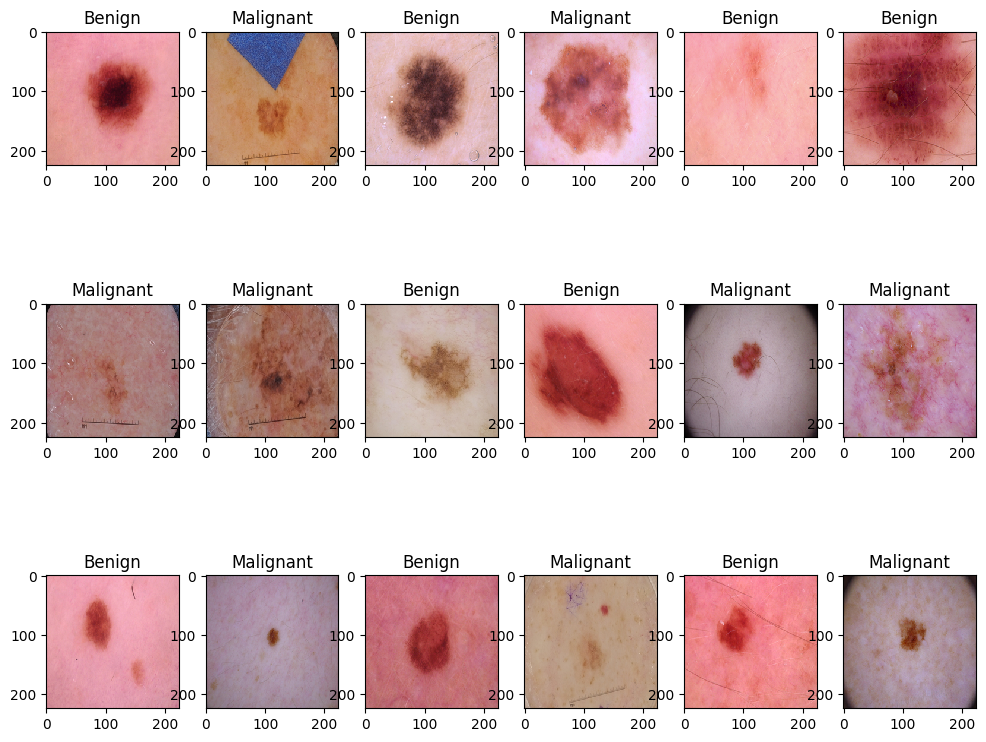

<Figure size 640x480 with 0 Axes>

In [6]:
# Display first 18 images of moles, and how they are classified
w=40
h=30
fig=plt.figure(figsize=(12, 10))
columns = 6
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()
plt.savefig("sample images from dataset")

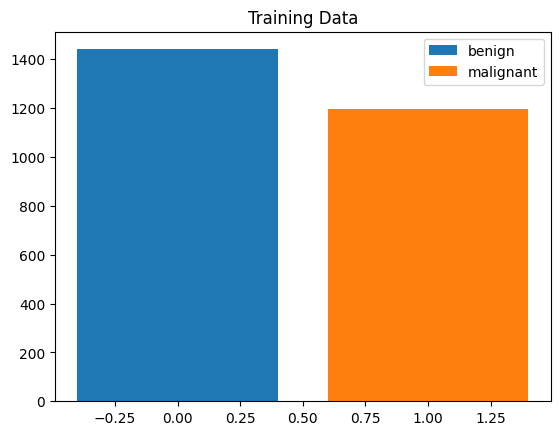

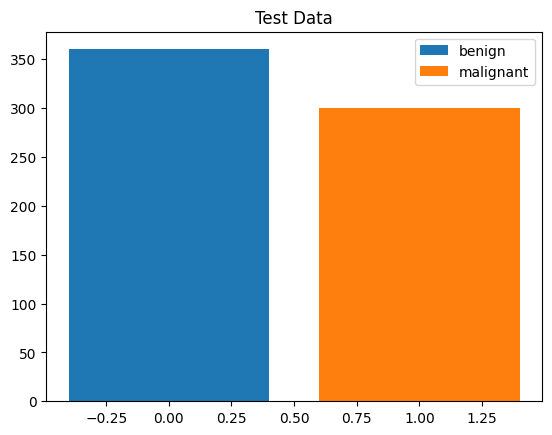

In [7]:
##objective - to make the data distribution almost same for train and test samples

plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label = 'benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Training Data")
plt.show()

plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label = 'benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Test Data")
plt.show()

In [7]:
X_train = X_train/255. #Nomalizing the data
X_test = X_test/255.

Image dimensions:  (224, 224)
Maximum pixel value : 255.0 ; Minimum pixel value:6.0
Mean value of the pixels : 166.4 ; Standard deviation : 44.0


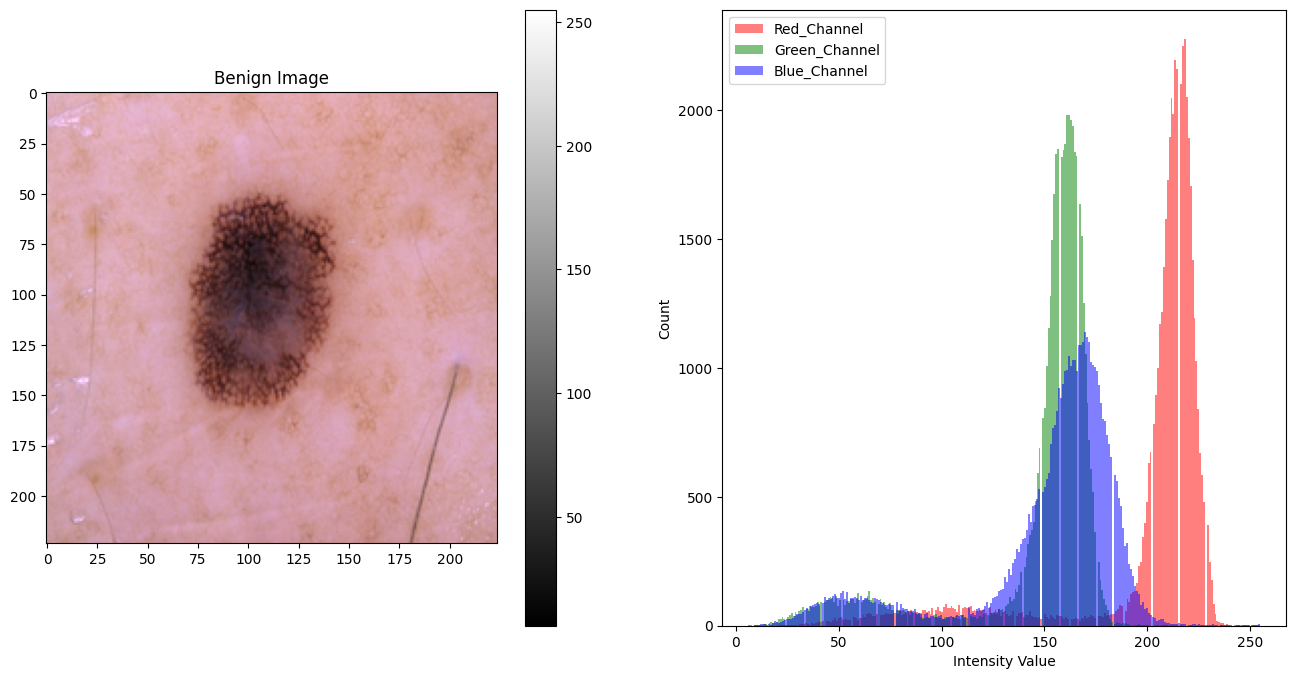

In [8]:
#histogram representation of first sample image of Benign category from train sample
import matplotlib.pyplot as plt

f = plt.figure(figsize=(16,8))
f.add_subplot(1,2, 1)

sample_img = r'100.jpg'
raw_image = plt.imread(os.path.join(folder_benign_train, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Benign Image')
print(f"Image dimensions:  {raw_image.shape[0],raw_image.shape[1]}")
print(f"Maximum pixel value : {raw_image.max():.1f} ; Minimum pixel value:{raw_image.min():.1f}")
print(f"Mean value of the pixels : {raw_image.mean():.1f} ; Standard deviation : {raw_image.std():.1f}")

f.add_subplot(1,2, 2)

#_ = plt.hist(raw_image.ravel(),bins = 256, color = 'orange',)
_ = plt.hist(raw_image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(raw_image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(raw_image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

Image dimensions:  (224, 224)
Maximum pixel value : 200.0 ; Minimum pixel value:9.0
Mean value of the pixels : 160.0 ; Standard deviation : 25.9


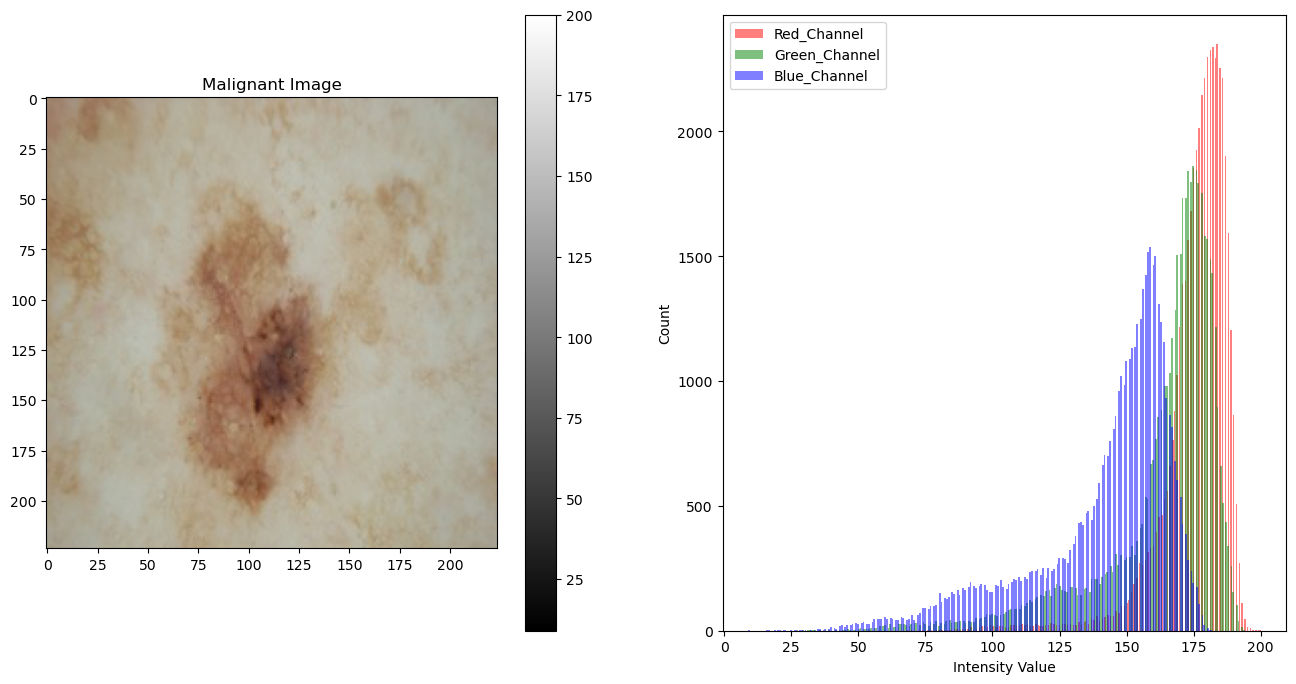

In [10]:
#histogram representation of first sample image of malignant category from train sample



f = plt.figure(figsize=(16,8))
f.add_subplot(1,2, 1)

sample_img = r'10.jpg'
raw_image = plt.imread(os.path.join(folder_malignant_train, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Malignant Image')
print(f"Image dimensions:  {raw_image.shape[0],raw_image.shape[1]}")
print(f"Maximum pixel value : {raw_image.max():.1f} ; Minimum pixel value:{raw_image.min():.1f}")
print(f"Mean value of the pixels : {raw_image.mean():.1f} ; Standard deviation : {raw_image.std():.1f}")

f.add_subplot(1,2, 2)

#_ = plt.hist(raw_image.ravel(),bins = 256, color = 'orange',)
_ = plt.hist(raw_image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(raw_image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(raw_image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

In [9]:
# Pixel distribution of Benign sample

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
img = cv2.imread(r'C:\Users\User\Documents\SURYA DOCS\data\train\benign\100.jpg')  # taking 1st benign picutures from the X_benign array 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()
#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

<Figure size 640x480 with 0 Axes>

C:\Users\User\AppData\Local\Temp\ipykernel_11500\3671451783.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


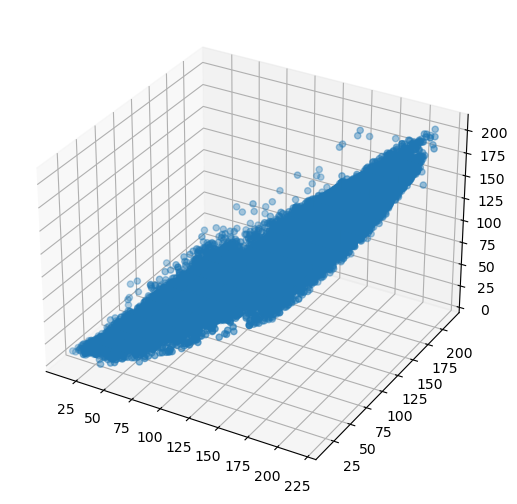

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
img = cv2.imread(r'C:\Users\User\Documents\SURYA DOCS\data\train\malignant/53.jpg')  # taking sample malignant picture from the malignant
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()
#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [18]:
# used model svm 
# fitted the trained data(benign+malignant)
from sklearn.svm import SVC

# model = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
# model = SVC()
# Model without fine tuning 
model= SVC()
model.fit(X_train.reshape(X_train.shape[0],-1), y_train)

SVC()

In [19]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test.reshape(X_test.shape[0],-1))

print(accuracy_score(y_test, y_pred)*100)

83.48484848484848


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.87      0.82      0.84       360
         1.0       0.80      0.86      0.83       300

    accuracy                           0.83       660
   macro avg       0.83      0.84      0.83       660
weighted avg       0.84      0.83      0.84       660



Text(0.5, 1.0, 'Support Vector Machine (SVM) Preformance')

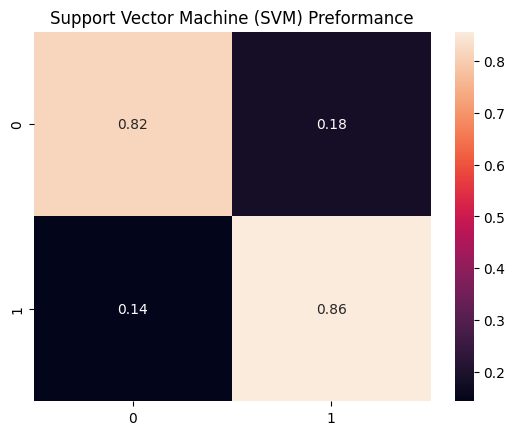

In [21]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot = True).set_title('Support Vector Machine (SVM) Preformance')

Text(0.5, 1.0, 'Incorrect Prediction Vs True Label of Support Vector Machine (SVM)')

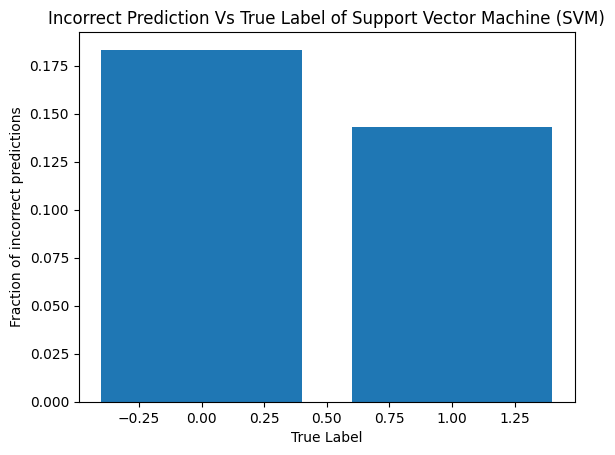

In [22]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.title('Incorrect Prediction Vs True Label of Support Vector Machine (SVM)')

In [23]:
y_train_pred = model.decision_function(X_train.reshape(X_train.shape[0],-1))    
y_test_pred = model.decision_function(X_test.reshape(X_test.shape[0],-1))

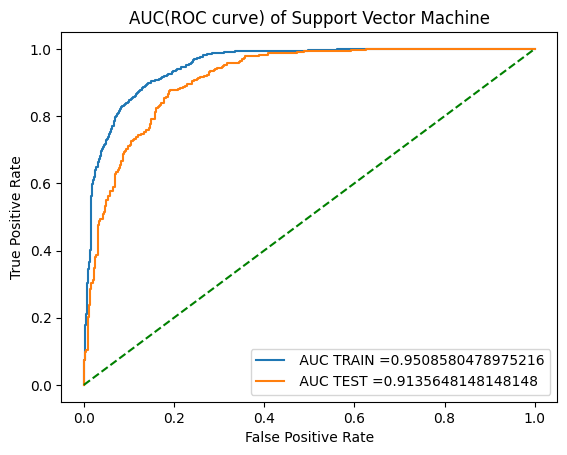

In [25]:
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

# plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve) of Support Vector Machine")
# plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()


In [21]:
#for installing XG-boost in Jupyter

pip install xgboost 



     --------------------------------------- 89.1/89.1 MB 11.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
import xgboost as xgb
# from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

xgbmodel = xgb.XGBClassifier()
xgbmodel.fit(X_train.reshape(X_train.shape[0],-1), y_train)
xgb_pred = xgbmodel.predict(X_test.reshape(X_test.shape[0],-1))

print('Accuracy of XGBOOST : ', metrics.accuracy_score(y_test, xgb_pred)*100)



Accuracy of XGBOOST :  82.57575757575758


In [13]:
from sklearn.metrics import classification_report
print('Classification report of XGBoost ')
print(classification_report(y_test, xgb_pred))

Classification report of XGBoost 
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84       360
         1.0       0.80      0.83      0.81       300

    accuracy                           0.83       660
   macro avg       0.82      0.83      0.82       660
weighted avg       0.83      0.83      0.83       660



Text(0.5, 1.0, 'XGBOOST Preformance')

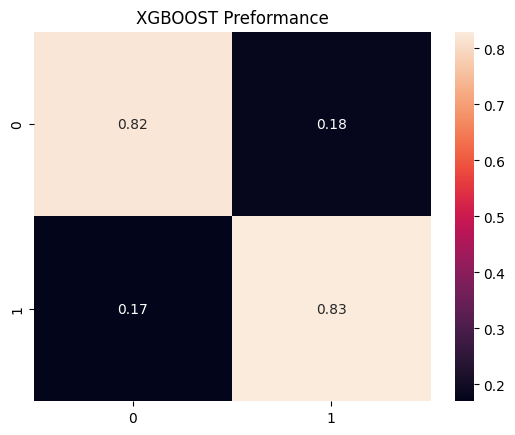

In [15]:
# Confusion matrix based on XGBOOST
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, xgb_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot = True).set_title('XGBOOST Preformance')

Text(0.5, 1.0, 'Incorrect Prediction Vs True Label of XGBoost')

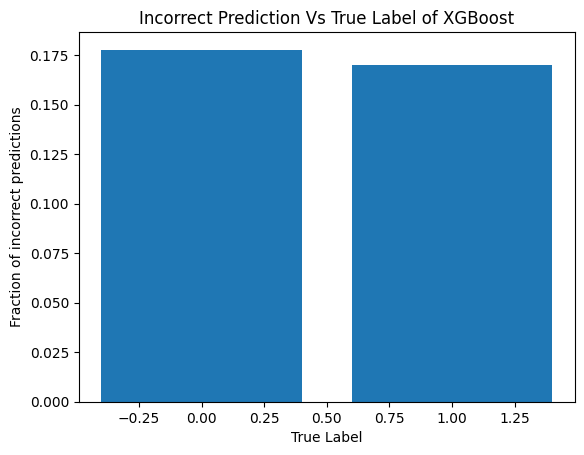

In [16]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.title('Incorrect Prediction Vs True Label of XGBoost')

In [24]:
probs_xg = xgbmodel.predict_proba(X_test.reshape(X_test.shape[0],-1))[:, 1]


In [25]:
from sklearn.metrics import roc_auc_score, roc_curve
auc_xg = roc_auc_score(y_test, probs_xg)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, probs_xg)

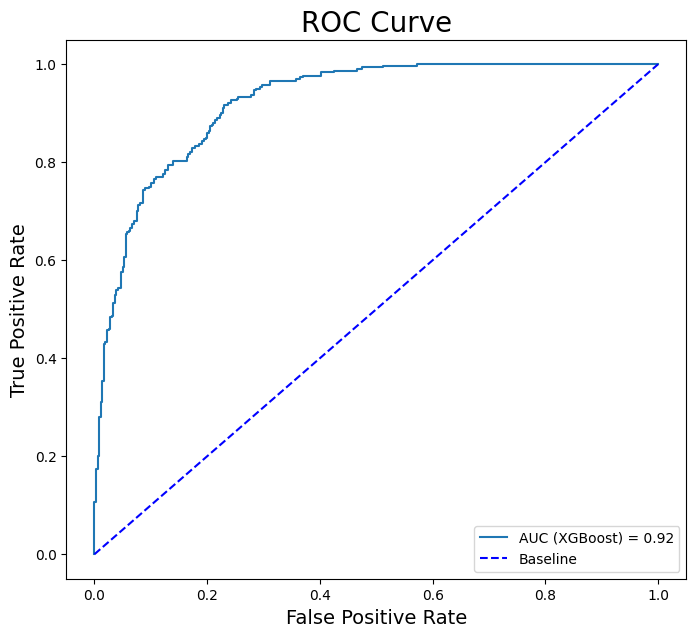

In [26]:
plt.figure(figsize=(8, 7))
# plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
# plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
# plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();


In [42]:
pip install lightgbm


     ---------------------------------------- 1.0/1.0 MB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Lgboost installations
import lightgbm as lgb
import sklearn.metrics as metrics


lgbmodel = lgb.LGBMClassifier()
lgbmodel.fit(X_train.reshape(X_train.shape[0],-1), y_train)
lgb_pred = lgbmodel.predict(X_test.reshape(X_test.shape[0],-1))
print('Accuracy of LG-BOOST : ', metrics.accuracy_score(y_test, lgb_pred)*100)


Accuracy of LG-BOOST :  83.78787878787878


In [10]:
from sklearn.metrics import classification_report
print('Classification report of LG-Boost ')
print(classification_report(y_test, lgb_pred))

Classification report of LG-Boost 
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       360
         1.0       0.80      0.86      0.83       300

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



Text(0.5, 1.0, 'LG-BOOST Preformance')

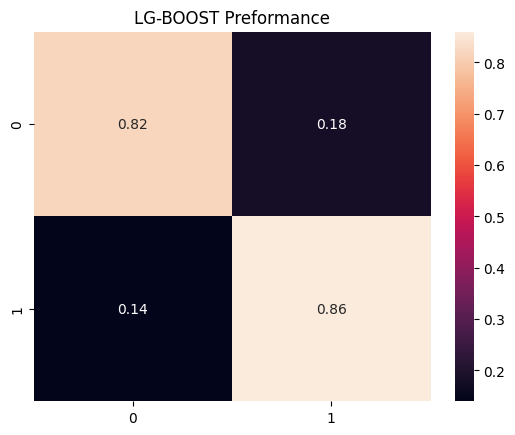

In [12]:
# Confusion matrix based on LG-BOOST
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lgb_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot = True).set_title('LG-BOOST Preformance')

Text(0.5, 1.0, 'Incorrect Prediction Vs True Label of LG-Boost')

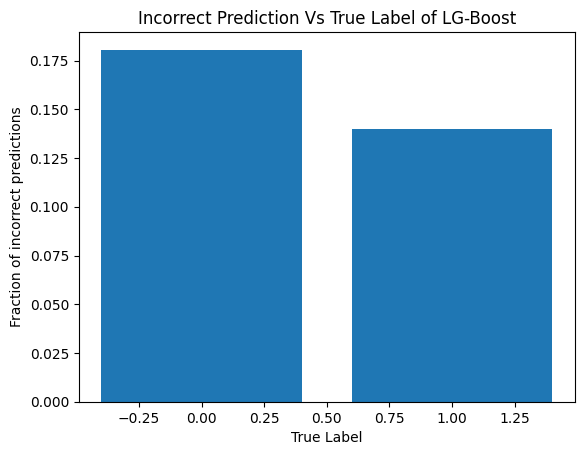

In [13]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.title('Incorrect Prediction Vs True Label of LG-Boost')

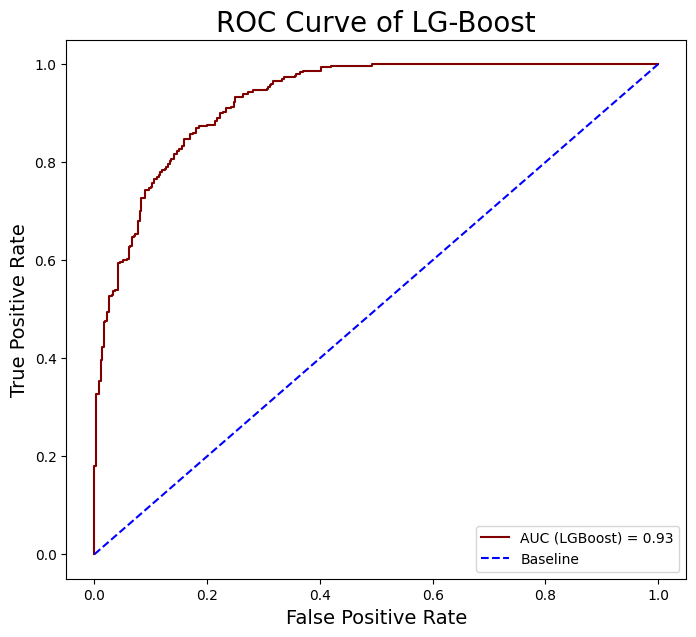

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve

probs_lg = lgbmodel.predict_proba(X_test.reshape(X_test.shape[0],-1))[:, 1]
auc_lg = roc_auc_score(y_test, probs_lg)
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, probs_lg)
plt.figure(figsize=(8, 7))
# plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
# plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
# plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
# plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot(fpr_lg, tpr_lg, color='maroon', label=f'AUC (LGBoost) = {auc_lg:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve of LG-Boost', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

In [ ]:
## Gradient Boost starts from below



In [17]:

from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics as metrics

gbmodel =  GradientBoostingClassifier()

gbmodel.fit(X_train.reshape(X_train.shape[0],-1), y_train)
gb_pred = gbmodel.predict(X_test.reshape(X_test.shape[0],-1))
print('Accuracy of Gradient BOOST : ', metrics.accuracy_score(y_test, gb_pred)*100)

Accuracy of Gradient BOOST :  83.63636363636363


In [18]:
from sklearn.metrics import classification_report
print('Classification report of Gradient-Boost ')
print(classification_report(y_test, gb_pred))

Classification report of Gradient-Boost 
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.84       360
         1.0       0.80      0.86      0.83       300

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



Text(0.5, 1.0, 'Gradient BOOST Preformance')

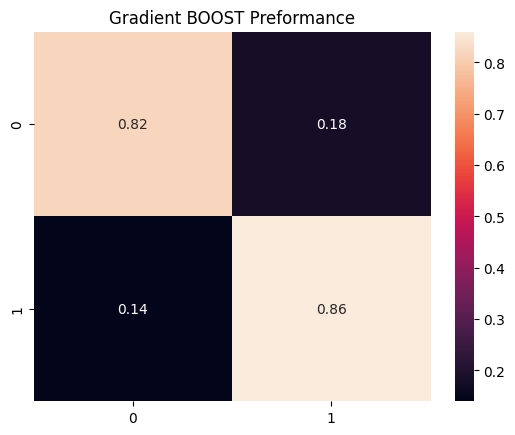

In [20]:
# Confusion matrix based on Gradient-BOOST
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lgb_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot = True).set_title('Gradient BOOST Preformance')

Text(0.5, 1.0, 'Incorrect Prediction Vs True Label of Gradient-Boost')

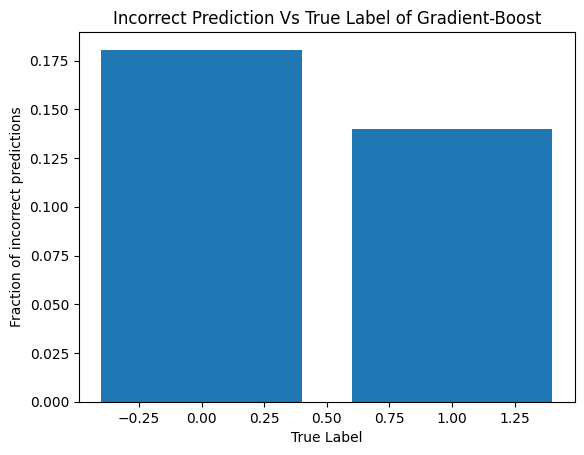

In [21]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.title('Incorrect Prediction Vs True Label of Gradient-Boost')

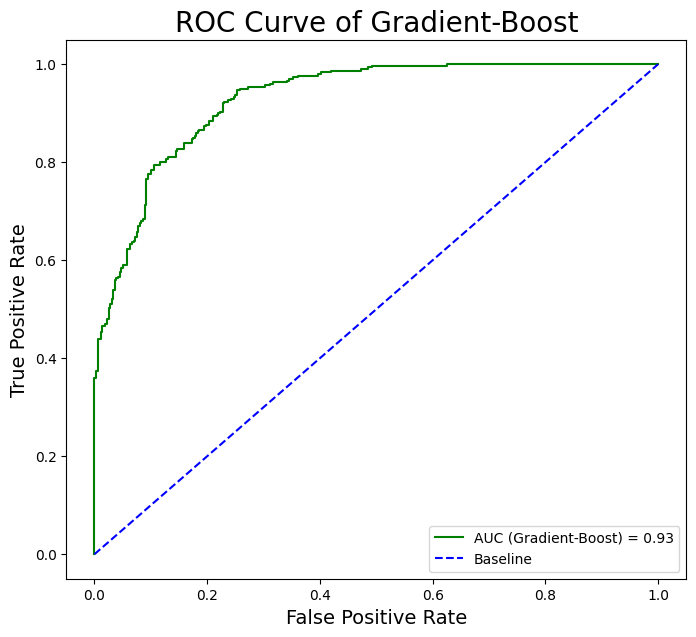

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve

probs_g = gbmodel.predict_proba(X_test.reshape(X_test.shape[0],-1))[:, 1]
auc_g = roc_auc_score(y_test, probs_lg)
fpr_g, tpr_g, thresholds_g = roc_curve(y_test, probs_g)
plt.figure(figsize=(8, 7))
# plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
# plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
# plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
# plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
# plt.plot(fpr_lg, tpr_lg, color='maroon', label=f'AUC (LGBoost) = {auc_lg:.2f}')
plt.plot(fpr_g, tpr_g, color='green', label=f'AUC (Gradient-Boost) = {auc_lg:.2f}')

plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve of Gradient-Boost', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

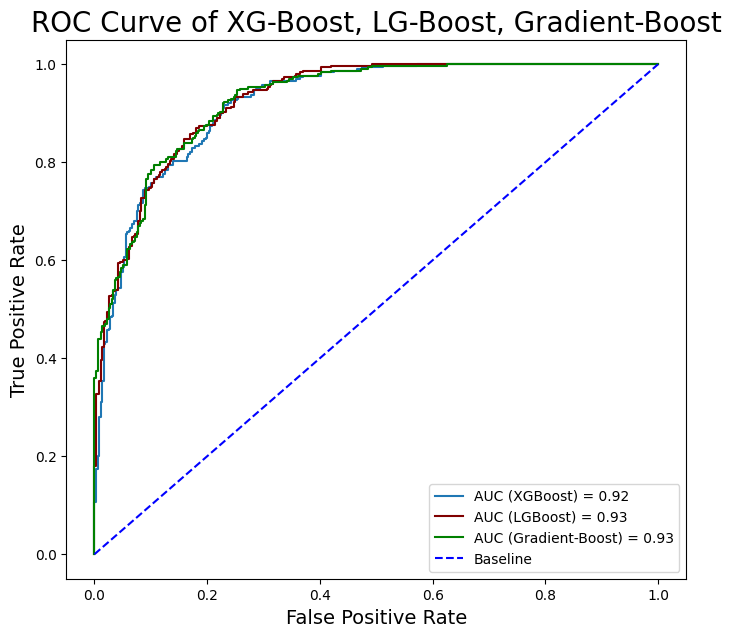

In [28]:
plt.figure(figsize=(8, 7))
# plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
# plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
# plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot(fpr_lg, tpr_lg, color='maroon', label=f'AUC (LGBoost) = {auc_lg:.2f}')
plt.plot(fpr_g, tpr_g, color='green', label=f'AUC (Gradient-Boost) = {auc_lg:.2f}')

plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve of XG-Boost, LG-Boost, Gradient-Boost', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

In [ ]:
pip install yellowbrick


In [33]:
# from sklearn.svm import SVC
# from sklearn.datasets import load_breast_cancer
# from yellowbrick.model_selection import learning_curve



# svm = SVC(C=10, kernel='rbf', gamma=.0001)
# print(learning_curve(model, y_train, y_test, cv=10, scoring='accuracy'))

In [34]:
X_train.shape

(2637, 224, 224, 3)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

NameError: name 'y_pred' is not defined

In [14]:
# I will perform this work after installation of GPU

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.reshape(X_train.shape[0],-1), y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time= 9.6min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.545 total time= 9.4min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.546 total time= 9.6min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.546 total time= 9.4min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.546 total time= 9.3min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.545 total time= 9.4min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.545 total time= 9.4min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.546 total time= 9.4min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.546 total time= 9.1min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.546 total time= 8.9min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.545 total time= 9.2min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.547 total time= 9.9min
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.546 total time= 9.5min
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.550 total time= 9.1min
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.546 total time= 9.1min
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.549 total time= 9.1min
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.547 total time= 9.1min
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.548 total time= 9.1min
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.550 total time= 9.2min
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.546 total time= 9.0min
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.561 total time= 9.2min
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.551 total time= 9.1min
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.562 total time= 9.4min
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [15]:
# print best parameter after tuning
print(grid.best_params_)
  


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [16]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=10, gamma=0.0001)


In [18]:
grid_predictions = grid.predict(X_test.reshape(X_test.shape[0],-1))
  


In [20]:
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84       360
         1.0       0.81      0.82      0.81       300

    accuracy                           0.83       660
   macro avg       0.83      0.83      0.83       660
weighted avg       0.83      0.83      0.83       660



In [19]:
from sklearn.metrics import accuracy_score, classification_report


In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84       360
         1.0       0.81      0.82      0.81       300

    accuracy                           0.83       660
   macro avg       0.83      0.83      0.83       660
weighted avg       0.83      0.83      0.83       660



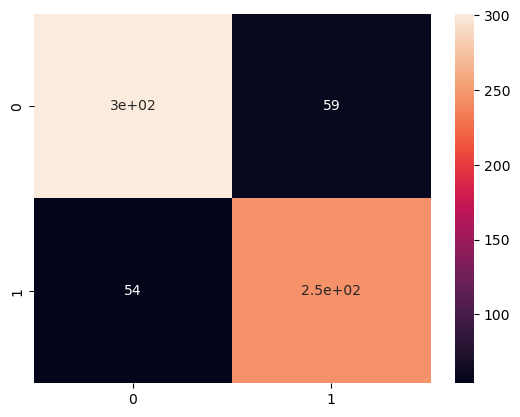

In [29]:
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))


In [ ]:
!pip3 install opencv-python



In [ ]:
pip install opencv-python


In [ ]:
!pip install opencv-python-headless

In [ ]:
conda activate opencv